# Day 20: Go Away!

[![GitHub License](https://img.shields.io/github/license/Dragon1573/PyChallenge-Tips?color=important&label=Licence&style=flat-square)](https://github.com/Dragon1573/PyChallenge-Tips/blob/master/LICENSE)
[![Jump to Level 20](https://img.shields.io/badge/Jump%20to-Level%2020-blue?style=flat-square)](http://www.pythonchallenge.com/pc/hex/idiot2.html)

<center>
    <img src="../../resources/imgs/Quiz20-1.png" />
    <br />
    <font color="gold">
        But inspecting it carefully is allowed.
    </font>
</center>

&emsp;&emsp;关卡主图片是一片围栏，围栏上有告示牌：**围栏内有私有属性**。单独打开图片，可以在`Response Headers`里找到以下内容；

```text
HTTP/1.1 200 OK
Transfer-Encoding: chunked
Content-Range: bytes 0-30202/2123456789
Content-Type: image/jpeg
Date: Sun, 12 Jan 2020 10:57:38 GMT
Keep-Alive: timeout=58
Server: lighttpd/1.4.35
```

&emsp;&emsp;看来，图片只是响应内容的一部分，或许还有别的信息藏在图片之后的相应内容中。

In [1]:
import requests
import re
from io import BytesIO
from IPython.display import Image

0-30203: 


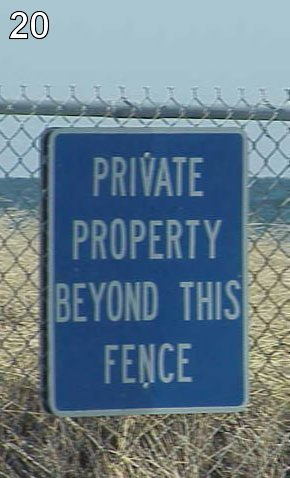

30203-30237: Why don't you respect my privacy?
30237-30284: we can go on in this way for really long time.
30284-30295: stop this!
30295-30313: invader! invader!
30313-30347: ok, invader. you are inside now. 


In [2]:
url = 'http://www.pythonchallenge.com/pc/hex/unreal.jpg'
header = {'Authorization': 'Basic YnV0dGVyOmZseQ=='}
pattern = re.compile(r'-(\d+)')
start = 0
while True:
    header['Range'] = 'bytes={0}-'.format(start)
    response = requests.post(url, headers=header)
    if response.text:
        print(start, end='-')
        start = int(pattern.search(response.headers['Content-Range']).group(1)) + 1
        if start != 30203:
            print(start, response.text, sep=': ', end='')
        else:
            print('%d: ' % start)
            display(Image(response.content))
    else:
        break

&emsp;&emsp;我们成功地完成了入侵，获得了**入侵者**称号！试试<http://www.pythonchallenge.com/pc/hex/invader.html>。

In [3]:
response = requests.get(
    'http://www.pythonchallenge.com/pc/hex/invader.html',
    headers={'Authorization': 'Basic YnV0dGVyOmZseQ=='}
)
print(response.text.strip())

Yes! that's you!


&emsp;&emsp;没有任何提示了？！看来这个方向有点问题。试试将请求数据段反过来呢？

In [4]:
url = 'http://www.pythonchallenge.com/pc/hex/unreal.jpg'
header = {'Authorization': 'Basic YnV0dGVyOmZseQ=='}
pattern = re.compile(r'\d+')
start = 2123456789
while True:
    header['Range'] = 'bytes={0}-'.format(start)
    response = requests.post(url, headers=header)
    if response.text:
        content_range = response.headers['Content-Range']
        response = response.text.strip()
        ranges = pattern.findall(content_range)
        print('%s-%s: %s' % (
            ranges[0], ranges[1], (response if start != 2123456789 else response[::-1])
        ))
        start = int(ranges[0]) - 1
    else:
        break

2123456744-2123456788: the password is your new nickname in reverse
2123456712-2123456743: and it is hiding at 1152983631.


&emsp;&emsp;现在，我们拿到了两个信息：

- 有一段数据隐藏在`unreal.jpg`中，他的数据块起点为`11592983631`（`'Range': 'bytes=1152983631-'`）
- 这段数据的密码是我们以逆序书写的昵称（`redavni`）

&emsp;&emsp;下载数据，并一探究竟。

In [5]:
from zipfile import ZipFile, ZIP_DEFLATED

In [6]:
response = requests.get(
    'http://www.pythonchallenge.com/pc/hex/unreal.jpg',
    headers={
        'Authorization': 'Basic YnV0dGVyOmZseQ==',
        'Range': 'bytes=1152983631-'
    }
)
file = ZipFile(BytesIO(response.content))
readme = file.open('readme.txt', mode='r', pwd='redavni'.encode())
print(readme.read().decode())

Yes! This is really level 21 in here. 
And yes, After you solve it, you'll be in level 22!

Now for the level:

* We used to play this game when we were kids
* When I had no idea what to do, I looked backwards.



&emsp;&emsp;太棒了，我们终于进入第21关了！！！